In [2]:
# C. Piermarocchi 2024
using LinearAlgebra
using Plots
using LaTeXStrings
using Distributions
using StatsPlots 
using StatsBase
gr();

In [4]:
function theta(F)
    # MA MB basis MC
    # Set parameters
    lp =1.25  #1.1 #1.25 #1.1  #1.28 #1.6 
    lm = 0.10246491930384 # 0.03768672638519 #0.10246491930384 #0.03768672638519 #0.17 #0.28694364781969034

    T = 1.0
    NA = 500000
    NB = 500000
    N = NA + NB
    MA = NA
    MB = -NB # Start with m2
    TMA = [MA] # store all MA
    TMB = [MB] # store all MB
    tsteps = N * 10

    # Simulation loop
    for i in 1:tsteps
        DMA = 0 # Initialize DMA to 0
        DMB = 0 # Initialize DMB to 0
        if rand(1:N) <= NA # picked spin in A 
            if rand(1:NA) <= (MA + NA) / 2 # pick up spin
                if i < tsteps / 3
                    prob = (1 - tanh(2 * (lp * (MA - 1) - lm * MB) / N)) / 2  
                else
                    prob = (1 - tanh(2 * (lp * (MA - 1) - lm * MB) / N + F)) / 2
                end
                DMA = -2 * (prob > rand())
                MA += DMA
                if abs(MA) >= NA 
                    DMA = 0
                    MA = sign(MA) * NA
                end
            else # pick down spin
                if i < tsteps / 3   
                    prob = (1 + tanh(2 * (lp * (MA + 1) - lm * MB) / N)) / 2
                else
                    prob = (1 + tanh(2 * (lp * (MA + 1) - lm * MB) / N + F)) / 2
                end
                DMA = 2 * (prob > rand())
                MA += DMA
                if abs(MA) >= NA
                    DMA = 0
                    MA = sign(MA) * NA
                end                
            end
        else # picked spin in in B
            if rand(1:NB) <= (MB + NB) / 2 # pick up spin
                if i < tsteps / 3
                    prob = (1 - tanh(2 * (lp * (MB - 1) + lm * MA) / N)) / 2
                else
                    prob = (1 - tanh(2 * (lp * (MB - 1) + lm * MA) / N + F)) / 2 
                end
                DMB = -2 * (prob > rand())
                MB += DMB
                if abs(MB) >= NB
                    DMB = 0
                    MB = sign(MB) * NB
                end
            else
                if i < tsteps / 3
                    prob = (1 + tanh(2 * (lp * (MB + 1) + lm * MA) / N)) / 2
                else
                    prob = (1 + tanh(2 * (lp * (MB + 1) + lm * MA) / N + F)) / 2
                end
                DMB = 2 * (prob > rand())
                MB += DMB 
                if abs(MB) >= NB
                    DMB = 0
                    MB = sign(MB) * NB
                end
            end
        end
        
        if mod(i, N/10) == 0
            append!(TMA, MA)
            append!(TMB, MB)
        end
    end

    return atan.((TMA .- TMB) ./ (TMA .+ TMB))
end


theta (generic function with 1 method)

In [6]:
# Range of F values
Fs = 0:.2:.8

# Store solutions for plotting
solution_curves = []


for F in Fs
    # calculate angle
    sol = theta(F)
    iF=floor(Int,size(sol)[1]/3)
    angle=sol[iF] .- sol[iF:end]

    # Compute F * t for the plot
    times=(1:1:size(angle)[1]) 
    Ft = (F)^(1/2) .* times .* 0.1
    y_vals = angle ./ F^(1/2) # Extract y values as a scalar array

    # Store the solution curve
    push!(solution_curves, (Ft, y_vals, F))
end

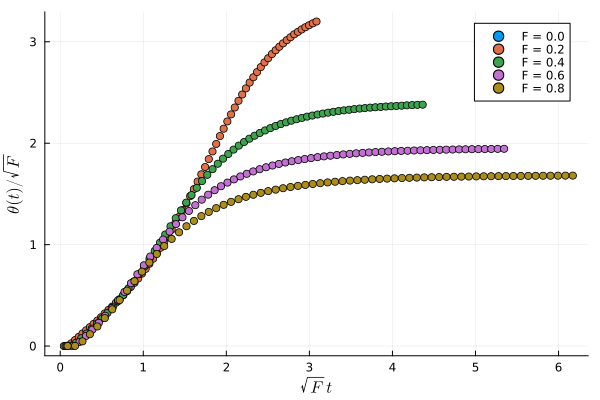

In [8]:
plt = plot(
   # title = L"Scaling~~Glauber",
    xlabel = L"\sqrt{F}\, t",
    ylabel = L"\theta(t)/\sqrt{F}",
    legend = true
)
for (Ft, y_vals, F) in solution_curves
    scatter!(Ft, y_vals, label="F = $F")
end

display(plt)